# Trabajo práctico de laboratorio N°1
#### Matías Blas Tassone 

$\omega_o=\frac{1}{80us}=12.5k\frac{rad}{s}\;\;\;\;\;\;\;\;\;\;
5\%\;error\;en\;f_1=3kHz\rightarrow\omega_1=6\pi \;k\frac{rad}{s}\;\;\;\;\;\;\;\;\;\alpha=1dB\;a\;f_2=2kHz\rightarrow \omega_2=4\pi\;k\frac{rad}{s}$

$\omega_{1N}=1.51$&emsp;$\omega_{2N}=1$&emsp;&rarr;&emsp;$n_1=3$&emsp;$n_2=3$&emsp;&rarr;&emsp;$n=3$&emsp;&emsp;&emsp;
Los filtros Bessel no tienen $\epsilon$

$$cotgh(s)=\frac{1}{s}+\frac{1}{\frac{3}{s}+\frac{1}{\frac{5}{s}}}=\frac{15}{s^3+6s^2+15s+15}=T(s)$$

In [1]:
import numpy as np
import scipy.signal as sig
from splane import tf2sos_analog

num = np.array([1])
den = np.array([1, 6, 15, 15])

mi_sos = sig.TransferFunction(num,den)        

TF = tf2sos_analog(num, den)

print (TF)

[[  0.           0.         -16.20389387   0.           1.
    2.32218535]
 [  0.           0.          -0.06171356   1.           3.67781465
    6.45943269]]


$$T(s)=\frac{2.322}{s+2.322}\cdot\frac{6.46}{s^2+3.678s+6.46}\;\;\;\;\;\;\;\;\;\;\;\;\;
p_1=-2.322+j0\;\;\;\;\;\;\;\;p_{2,3}=-1.8389\pm j1.7544\;\;\;\;\;\;\;\;\;\;\;\;\;
3\;ceros\;en\;\infty$$

$$\omega_o=2.542\;\;\;\;\;\;\;\;\;\;\;\;Q=0.691$$

Para la síntesis del circuito externo, se toma como $\Omega_Z=50k\Omega$, ya que todos los resistores internos del UAF42 son de ese valor. $\Omega_\omega=12.5k\frac{rad}{s}$

Utilizando las fórmulas propuestas por la hoja de datos, con el siguiente esquemático, se procede a calcular los valores de los componentes.

<img src="./circ.png">

$$\omega_n^2=\frac{R_2}{R_1R_{F1}R_{F2}C_1C_2}\;\;\;\;\;\;\;\;\;\;\;
Q=\frac{1+\frac{R_4(R_G+R_Q)}{R_GR_Q}}{1+\frac{R_2}{R_1}}\cdot(\frac{R_2R_{F1}C_1}{R_1R_{F2}C_2})^{1/2}
\;\;\;\;\;\;\;\;\;\;\; A_{LP}=\frac{1+\frac{R_1}{R_2}}{R_G(\frac{1}{R_G}+\frac{1}{R_Q}+\frac{1}{R_4})}$$

$$R_1=R_2=R_4=50k\Omega\;\rightarrow\;R_{1N}=R_{2N}=R_{4N}=1\;\;\;\;\;\;\;\;\;\;C_1=C_2=1nF$$

$$\omega_n^2=\frac{1}{R_{F1}R_{F2}\cdot10^{-18}}\;\;\;\;\;\;\;\;\;\;\;
Q=\frac{1+\frac{50k(R_G+R_Q)}{R_GR_Q}}{2}\cdot(\frac{R_{F1}}{R_{F2}})^{1/2}
\;\;\;\;\;\;\;\;\;\;\; A_{LP}=\frac{2}{R_G(\frac{1}{R_G}+\frac{1}{R_Q}+\frac{1}{50k})}$$

Al tener $3$ ecuaciones con $4$ incógnitas ($R_{F1},R_{F2},R_G,R_Q$) y para simplificar los cálculos elijo $R_Q=50k\Omega$ y las ecuaciones quedarían de la siguiente manera.

$$\omega_n^2=\frac{1}{R_{F1}R_{F2}\cdot10^{-18}}\;\;\;\;\;\;\;\;\;\;\;
Q=\frac{1+\frac{(50k+R_G)}{R_G}}{2}\cdot(\frac{R_{F1}}{R_{F2}})^{1/2}
\;\;\;\;\;\;\;\;\;\;\; A_{LP}=\frac{2}{(1+2\cdot\frac{R_G}{50k})}$$

Quiero que mi ganancia sea $A_{LP}=1$, la $\omega$ obtenida era $\omega_o=12.5k\frac{rad}{s}$&emsp;&rarr;&emsp;$\omega=2.542\cdot12.5k=31.775k$ y el $Q$ obtenido era de $0.691$

$$R_G=25k\Omega\;\rightarrow\;Q=2\cdot(\frac{R_{F1}}{R_{F2}})^{1/2}\;\rightarrow\;\frac{R_{F1}}{R_{F2}}=\frac{Q^2}{4}=0.1194
\;\rightarrow\;R_{F1}=0.1194\cdot R_{F2}$$

$$R_{F2}^2=\frac{1}{0.1194\cdot(31.775k)^2\cdot 10^{-18}}\;\rightarrow\;R_{F2}=91.078k\Omega\;\rightarrow\;R_{F1}=10.8747k\Omega$$

### Simulaciones

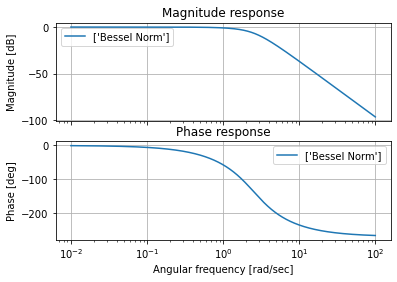

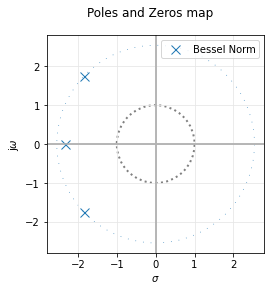

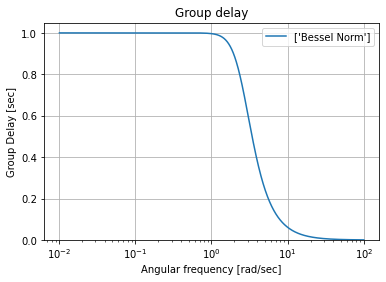

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys

num = np.array([15]) 
den = np.array([1, 6, 15, 15])

BesselN = sig.TransferFunction(num,den)    

analyze_sys(BesselN, 'Bessel Norm')   

En Matlab calculo la matriz desnormalizada y obtengo

Tbp =
 
                 2.93 e13
 ----------------------------------------
  s^3 + 75000 s^2 + 2.344e09 s + 2.93e13
 
Continuous-time transfer function.

<img src="./sim.png">

<img src="./spice.png">

<img src="./sim-spice.png">

Además, se realiza un análisis de Montecarlo del circuito obtenido

<img src="./circ-mc.png">

<img src="./sim-mc.png">